In [1]:
import os

import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.1f}'.format
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

output = "analysis"
os.makedirs(output, exist_ok=True)

In [2]:
df_mpjpe = pd.DataFrame(columns=["Camera", "Data", "Frame", "MPJPE"])
df_jee = pd.DataFrame(columns=["Camera", "Data", "Joint", "Error"])

for camera_num in range(5):
    for data_num in range(10):
        true_path = f"annotations/hirasaki_{camera_num}_{data_num}.csv"
        df_true = pd.read_csv(true_path, index_col=0)
        columns = [s.replace("_x", "") for s in df_true.columns if "_x" in s]

        pred_path = f"data/hirasaki_{camera_num}_{data_num}/position_data.csv"
        df_pred = pd.read_csv(pred_path, index_col=0)

        df_error = pd.DataFrame(columns=columns, index=df_true.index)
        for column in columns:
            x_label = f"{column}_x"
            y_label = f"{column}_y"
            df_error[column] = np.sqrt((df_true[x_label] - df_pred[x_label]) ** 2 + (df_true[y_label] - df_pred[y_label]) ** 2)
        
        df_error[df_error > 50] = np.nan # 動画とグラフで確認し、異常値を除外
        
        mpjpes = df_error.mean(axis=1)       
        for idx, mpjpe in mpjpes.items():
            df_mpjpe.loc[len(df_mpjpe)] = [camera_num, data_num, idx, mpjpe]
        
        jee = df_error.mean(axis=0)
        for column, error in jee.items():
            df_jee.loc[len(df_jee)] = [camera_num, data_num, column, error]

df_mpjpe.to_csv(f"{output}/mpjpe.csv")
df_jee.to_csv(f"{output}/jee.csv")

In [5]:
mpjpe = pd.DataFrame(df_mpjpe[["Camera", "Data", "MPJPE"]].groupby(["Camera", "Data"]).mean().values.reshape(5, -1), index=["Camera 0", "Camera 1", "Camera 2", "Camera 3", "Camera 4"], columns=[f"Data {i}" for i in range(10)])
display(mpjpe)

,Data 0,Data 1,Data 2,Data 3,Data 4,Data 5,Data 6,Data 7,Data 8,Data 9
Camera 0,13.2,14.6,17.2,13.9,15.4,17.7,19.1,18.9,18.2,18.1
Camera 1,14.4,12.5,13.2,12.5,13.8,14.7,13.1,14.2,13.5,12.4
Camera 2,11.2,9.6,9.7,9.8,10.0,10.0,9.8,9.9,9.8,9.6
Camera 3,21.3,17.1,16.8,17.4,18.5,18.3,18.1,22.2,22.2,19.0
Camera 4,21.0,18.5,20.1,18.5,20.7,18.2,20.1,21.6,20.9,19.8


In [6]:
df_mpjpe[["Camera", "MPJPE"]].groupby(["Camera"]).mean()

,MPJPE
Camera,
0.0,16.7
1.0,13.4
2.0,9.9
3.0,18.9
4.0,19.9


In [26]:
jee = pd.DataFrame(df_jee[["Camera", "Joint", "Error"]].groupby(["Camera", "Joint"]).mean().values.reshape(4, -1), index=["Camera 0", "Camera 2", "Camera 3", "Camera 4"], columns=columns)
display(jee)

,LEFT_SHOULDER,RIGHT_SHOULDER,LEFT_ELBOW,RIGHT_ELBOW,LEFT_WRIST,RIGHT_WRIST,LEFT_HIP,RIGHT_HIP,LEFT_KNEE,RIGHT_KNEE,LEFT_ANKLE,RIGHT_ANKLE
Camera 0,8.9,6.8,22.6,13.6,11.2,25.1,13.4,16.6,27.1,18.7,12.8,23.4
Camera 2,12.0,5.6,12.6,5.9,10.6,10.9,13.8,7.5,10.4,7.5,10.2,12.1
Camera 3,16.6,20.5,18.4,18.5,10.4,16.7,17.3,22.2,19.6,19.3,26.0,20.5
Camera 4,14.0,18.2,23.1,20.9,18.5,24.0,16.7,22.1,21.3,16.6,18.2,24.6


<Figure size 1200x600 with 0 Axes>

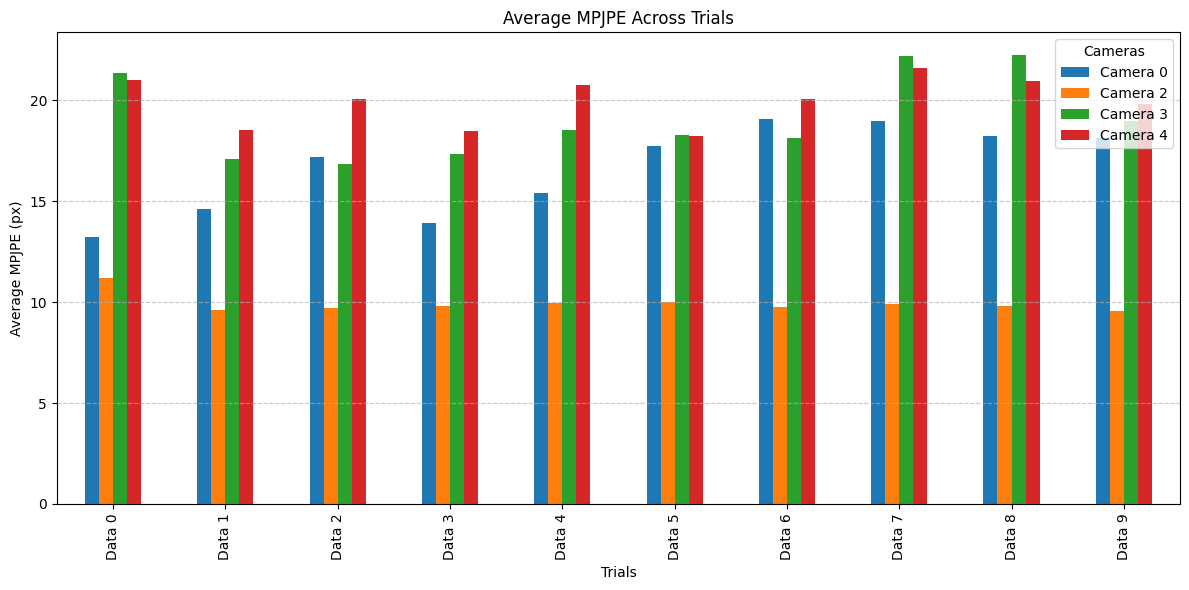

In [32]:
plt.figure(figsize=(12, 6))
mpjpe.T.plot(kind='bar', figsize=(12, 6))

plt.title("Average MPJPE Across Trials")
plt.xlabel("Trials")
plt.ylabel("Average MPJPE (px)")
plt.legend(title="Cameras", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f"pp/14_mpjpe_2d.png")
plt.show()

<Figure size 1200x600 with 0 Axes>

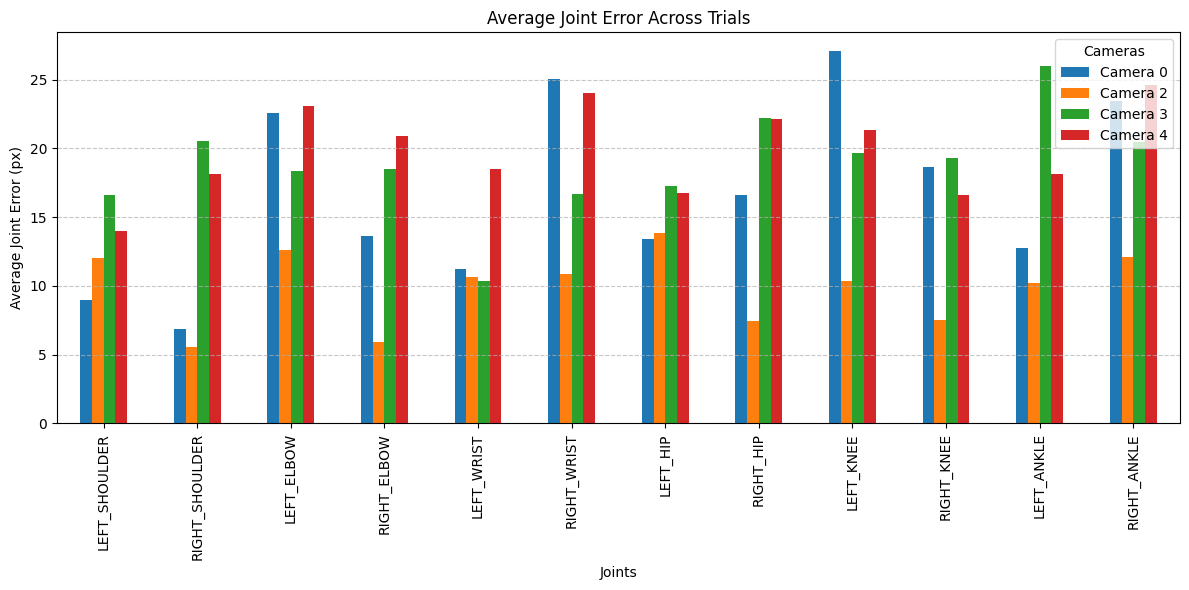

In [33]:
plt.figure(figsize=(12, 6))
jee.T.plot(kind='bar', figsize=(12, 6))

plt.title("Average Joint Error Across Trials")
plt.xlabel("Joints")
plt.ylabel("Average Joint Error (px)")
plt.legend(title="Cameras", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f"pp/15_jee_2d.png")
plt.show()